<a href="https://colab.research.google.com/github/AadityaAdh/CNN_basics/blob/main/CNN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN(Convolutional Neural Networks)
CNN stands for Convolutional Neural Network. It is a type of artificial neural network designed for processing and analyzing visual data, such as images and videos.

The architecture of a CNN is inspired by the organization of the visual cortex in animals/humans.

#Need of CNN
kina CNN use garnu paryo ta ANN huda hudai

    1.high computational cost:vanya image 1024*1024 pixel ko ni hunxa
    aaba sabbai pixel input diyo vanae tya trainable parameters pani dherai hunxa.
    like weights haru pani dherai hunxa .muni example xa

    2.overfitting:train garda ko data ma matra ramro accuracy aauxa
    yedi kunai halka shift vako image haru diyo vanae result aacrate hudaina

#High Computational Cost


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
path="/content/Computation_complexity.png"

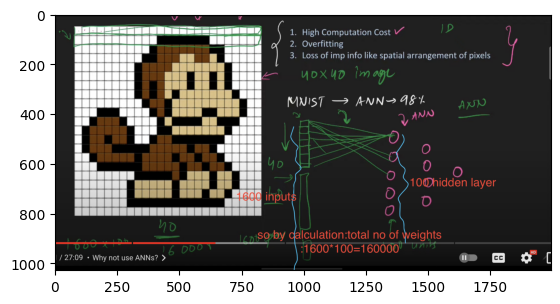

In [21]:
img=mpimg.imread(path)
plt.imshow(img)
plt.show()

so we can clearly see in between input and hidden layers there is 1 lakh 60 thousand weights so there could be more layers and these numbers can go really high and back propagation has to adjust a lot of weights(trainable parameters) and it takes time
so we can say it has high computational cost

#so how do CNN works?

yeuta chitra xa lets say of 9

then it first detects the edges like vertical edges,horizontal edges then combines these egdes to form new useful shape again these useful shapes are combined to derive new shape tala figure ma xa k vanae ko


https://towardsdatascience.com/visualizing-the-fundamentals-of-convolutional-neural-networks-6021e5b07f69

for simulation:

https://deeplizard.com/resource/pavq7noze2

In [5]:
#lets generate image as 1 witten in it

In [6]:
import numpy as np
one_image=np.array([
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,1,1,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
])

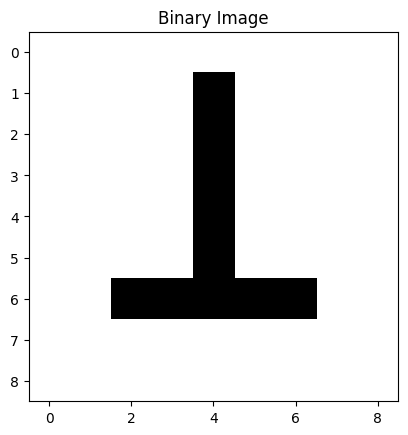

In [8]:
plt.imshow(one_image, cmap='binary', interpolation='nearest')
plt.title('Binary Image')
plt.show()

In [9]:
#now lets apply fliters using convolution in this
from scipy.ndimage import convolve

In [14]:
vertical_edge_filter = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

In [15]:
vertical_edge_detected_image = convolve(one_image, vertical_edge_filter, mode='constant', cval=0.0)

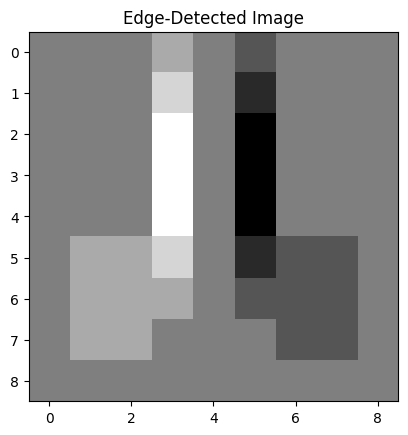

In [16]:
plt.imshow(vertical_edge_detected_image, cmap='binary', interpolation='nearest')
plt.title('Edge-Detected Image')
plt.show()

#now lets do pooling
To apply max pooling to the image, you can use the scipy.ndimage module in combination with skimage.measure.block_reduce from scikit-image


In [17]:
from skimage.measure import block_reduce

In [18]:
# Define a 2x2 max pooling filter
pooling_size = (2, 2)

# Apply max pooling to the vertical edge-detected image
max_pooled_vertical_edge_image = block_reduce(vertical_edge_detected_image, pooling_size, np.max)


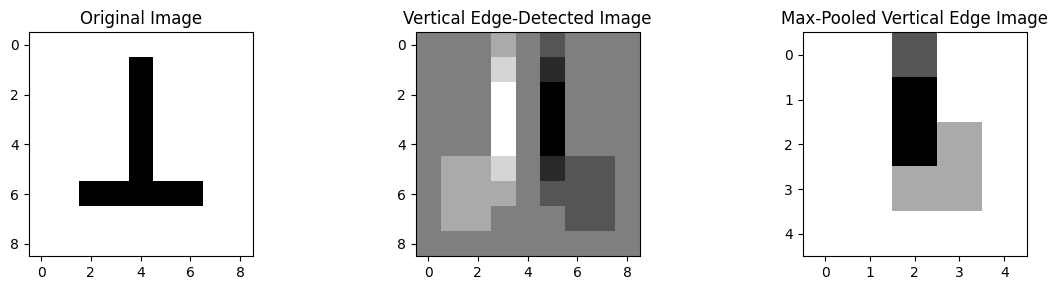

In [19]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.imshow(one_image, cmap='binary', interpolation='nearest')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(vertical_edge_detected_image, cmap='binary', interpolation='nearest')
plt.title('Vertical Edge-Detected Image')

plt.subplot(133)
plt.imshow(max_pooled_vertical_edge_image, cmap='binary', interpolation='nearest')
plt.title('Max-Pooled Vertical Edge Image')

plt.tight_layout()
plt.show()

#vertical edge le feature extraction garda kei meaningful huni vayae na
so use edge dection as shown below

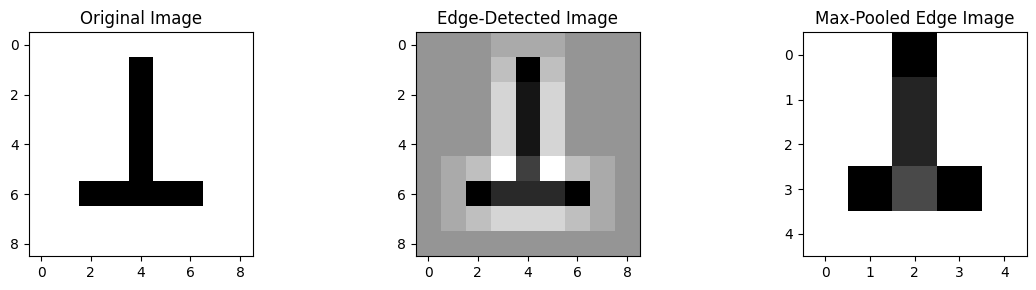

In [20]:


# Binary image
one_image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
])

# Define a 3x3 edge detection filter
edge_filter = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])

# Apply the edge detection filter
edge_detected_image = convolve(one_image, edge_filter, mode='constant', cval=0.0)

# Define a 2x2 max pooling filter
pooling_size = (2, 2)

# Apply max pooling to the edge-detected image
max_pooled_edge_image = block_reduce(edge_detected_image, pooling_size, np.max)

# Display the original, edge-detected, and max-pooled images
plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.imshow(one_image, cmap='binary', interpolation='nearest')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(edge_detected_image, cmap='binary', interpolation='nearest')
plt.title('Edge-Detected Image')

plt.subplot(133)
plt.imshow(max_pooled_edge_image, cmap='binary', interpolation='nearest')
plt.title('Max-Pooled Edge Image')

plt.tight_layout()
plt.show()


#pooling

straide vanya chai kati oota value lai xode ra oota lani vanya pooling ma
max pooling le max value dinxa average pooilng lae tyo box ma vako ko average

use this video for full on:

https://www.youtube.com/watch?v=HGwBXDKFk9I




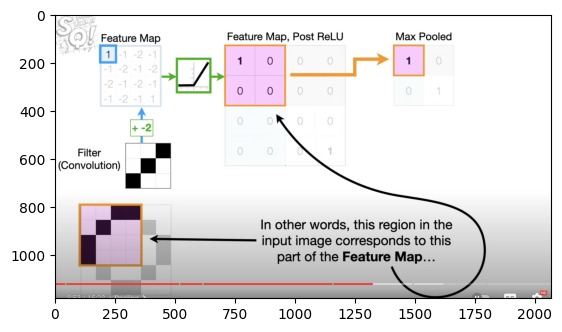

In [22]:
path="/content/conv_pool.png"
img=mpimg.imread(path)
plt.imshow(img)
plt.show()


tyo pool ko output ma 1 xa vane tyo thau ma filter ko pattern xa hai vanya

aaba jun sukai data aauda pani tyo thau or tesko halka yeta oota  ma testo xa vanae(as yeuta rectangle purai vitra ko maximum  herya xa  ), convolution ra max pooling garda ta same result aauxa

eg:

1,0,0

0,0,0

0,0,0

yesto ma xa max pooling vanae yellae output 1 aauxa


0,0,1

0,0,0

0,0,0

yesko pani result 1


vanna khojya k vanae tyakkai tei thau ma tyo filter ko pattern hunu parxa vanni xaina

halka para tei pattern aayae pani tei result aauxa


max pooling garda tei original image nai sano form aauxa vanni haina tyo filter sanga match garda yaa yaa xa vanni matrai ho aaba naya image aayo tesko pani pooling garda tei   pattern xa vanni vayo vanae aani classification garda same result aauxa



#pooling objectives
Pooling is a down-sampling operation commonly used in convolutional neural networks (CNNs) and other image processing tasks. The main objectives of pooling are:

Down-sampling: Pooling reduces the spatial dimensions (width and height) of the input data, effectively down-sampling the information. This helps in decreasing the computational complexity of the network and reducing the number of parameters.

main vanae kai required trainable parameters ghatauna ho(weights required ) ,by reducing no of inputs

#aailae yo binary image vayae ra po edge ta pailei detect vai sakya xa vanay jasto vako

paxi cat dog haru ko image aayae ma tessai tha hunna computer lai so edge detection filter using convolution then max pooling